In [1]:

import pandas as pd
import numpy as np
from collections import Counter
import os.path as osp
import json
import matplotlib.pyplot as plt
import pickle

# Print all variables on their own lines
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_rows', 1000)

# Use latex in mpl
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}' #for \text command


In [2]:
"""First run dataset saving script that saves all per-sample entries in the stream."""

# Excludes unseen actions during pretrain
TRAIN_USERS_MODE=False

if TRAIN_USERS_MODE:
    segmented_ckpt = "/home/matthiasdelange/sftp_remote_projects/ContextualOracle_Matthias/results/ego4d_action_recog/summarize_streams/logs/2022-10-07_04-49-02_UIDa5c4c52b-a8d8-4155-b1f4-bed9cd82374e/dataset_entries_train_FEWSHOT=False_ego4d_LTA_train_usersplit_10users.ckpt"
else:
    segmented_ckpt = "/home/matthiasdelange/sftp_remote_projects/ContextualOracle_Matthias/results/ego4d_action_recog/summarize_streams/logs/2022-10-07_04-33-34_UIDd679068a-dc6e-40ff-b146-70ffe0671a97/dataset_entries_test_FEWSHOT=False_ego4d_LTA_test_usersplit_40users.ckpt"


FILE_TO_ANALYZE = segmented_ckpt


with open(FILE_TO_ANALYZE, 'rb') as f:
    ds = pickle.load(f)

""" Create DF """
def ds_to_user_dfs(ds):
    ret = {}
    for user, user_entries in ds.items():
        # Do all for actions/verbs/nouns
        user_df = pd.json_normalize(user_entries)  # Convert to DF
    
        # Create action column
        def label_fn(x):
            assert len(x) == 2, "Need two columns to merge"
            if not isinstance(x[0],list):
                assert not isinstance(x[1],list)
                return f"{x[0]}-{x[1]}"

            return [f"{l}-{r}" for l,r in zip(x[0],x[1])]

        user_df['action_label'] = user_df.loc[:,('verb_label','noun_label')].apply(label_fn,axis=1)
        ret[user] = user_df
        print("Created action_label column")
    return ret

# MAIN SCRIPT
dfs = ds_to_user_dfs(ds) # Preprocess dataframes

'First run dataset saving script that saves all per-sample entries in the stream.'

' Create DF '

Created action_label column
Created action_label column
Created action_label column
Created action_label column
Created action_label column
Created action_label column
Created action_label column
Created action_label column
Created action_label column
Created action_label column
Created action_label column
Created action_label column
Created action_label column
Created action_label column
Created action_label column
Created action_label column
Created action_label column
Created action_label column
Created action_label column
Created action_label column
Created action_label column
Created action_label column
Created action_label column
Created action_label column
Created action_label column
Created action_label column
Created action_label column
Created action_label column
Created action_label column
Created action_label column
Created action_label column
Created action_label column
Created action_label column
Created action_label column
Created action_label column
Created action_label

" Plot average histogram over user's actions/verbs/nouns."

Saved plot: ../imgs/label_histogram_new/2022-10-27_18-17-40_LABEL_HISTOGRAM_TEST/LABEL_HISTOGRAM_TEST_verb (high to low frequency per user).pdf


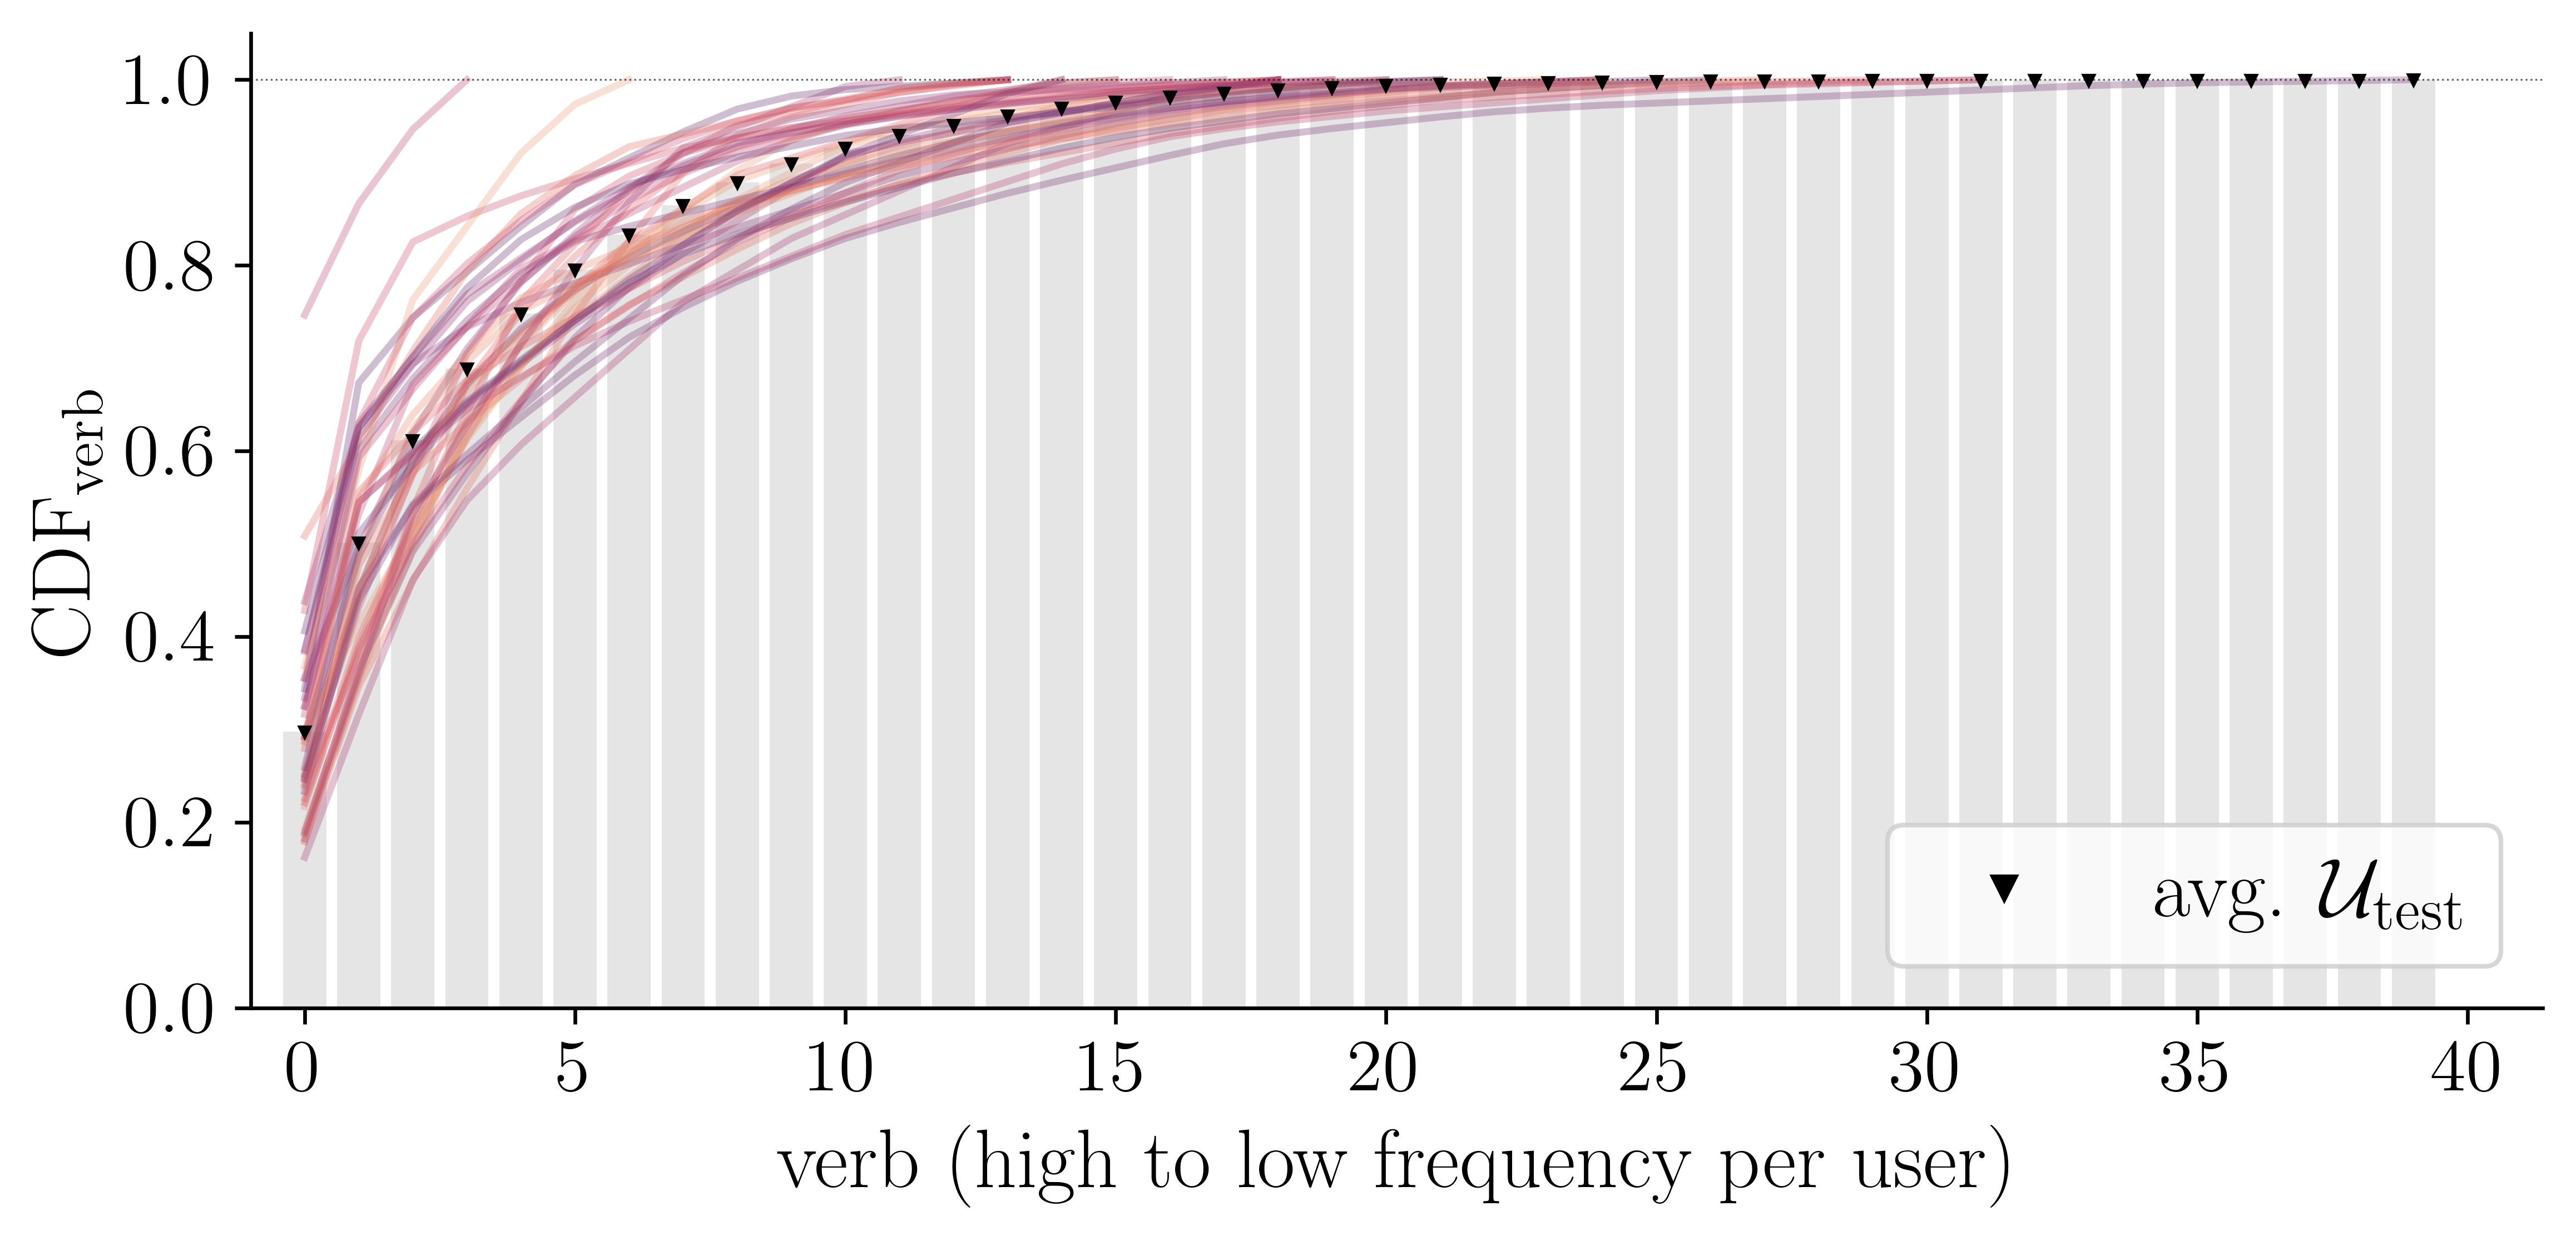

Saved plot: ../imgs/label_histogram_new/2022-10-27_18-17-40_LABEL_HISTOGRAM_TEST/LABEL_HISTOGRAM_TEST_noun (high to low frequency per user).pdf


<Figure size 432x288 with 0 Axes>

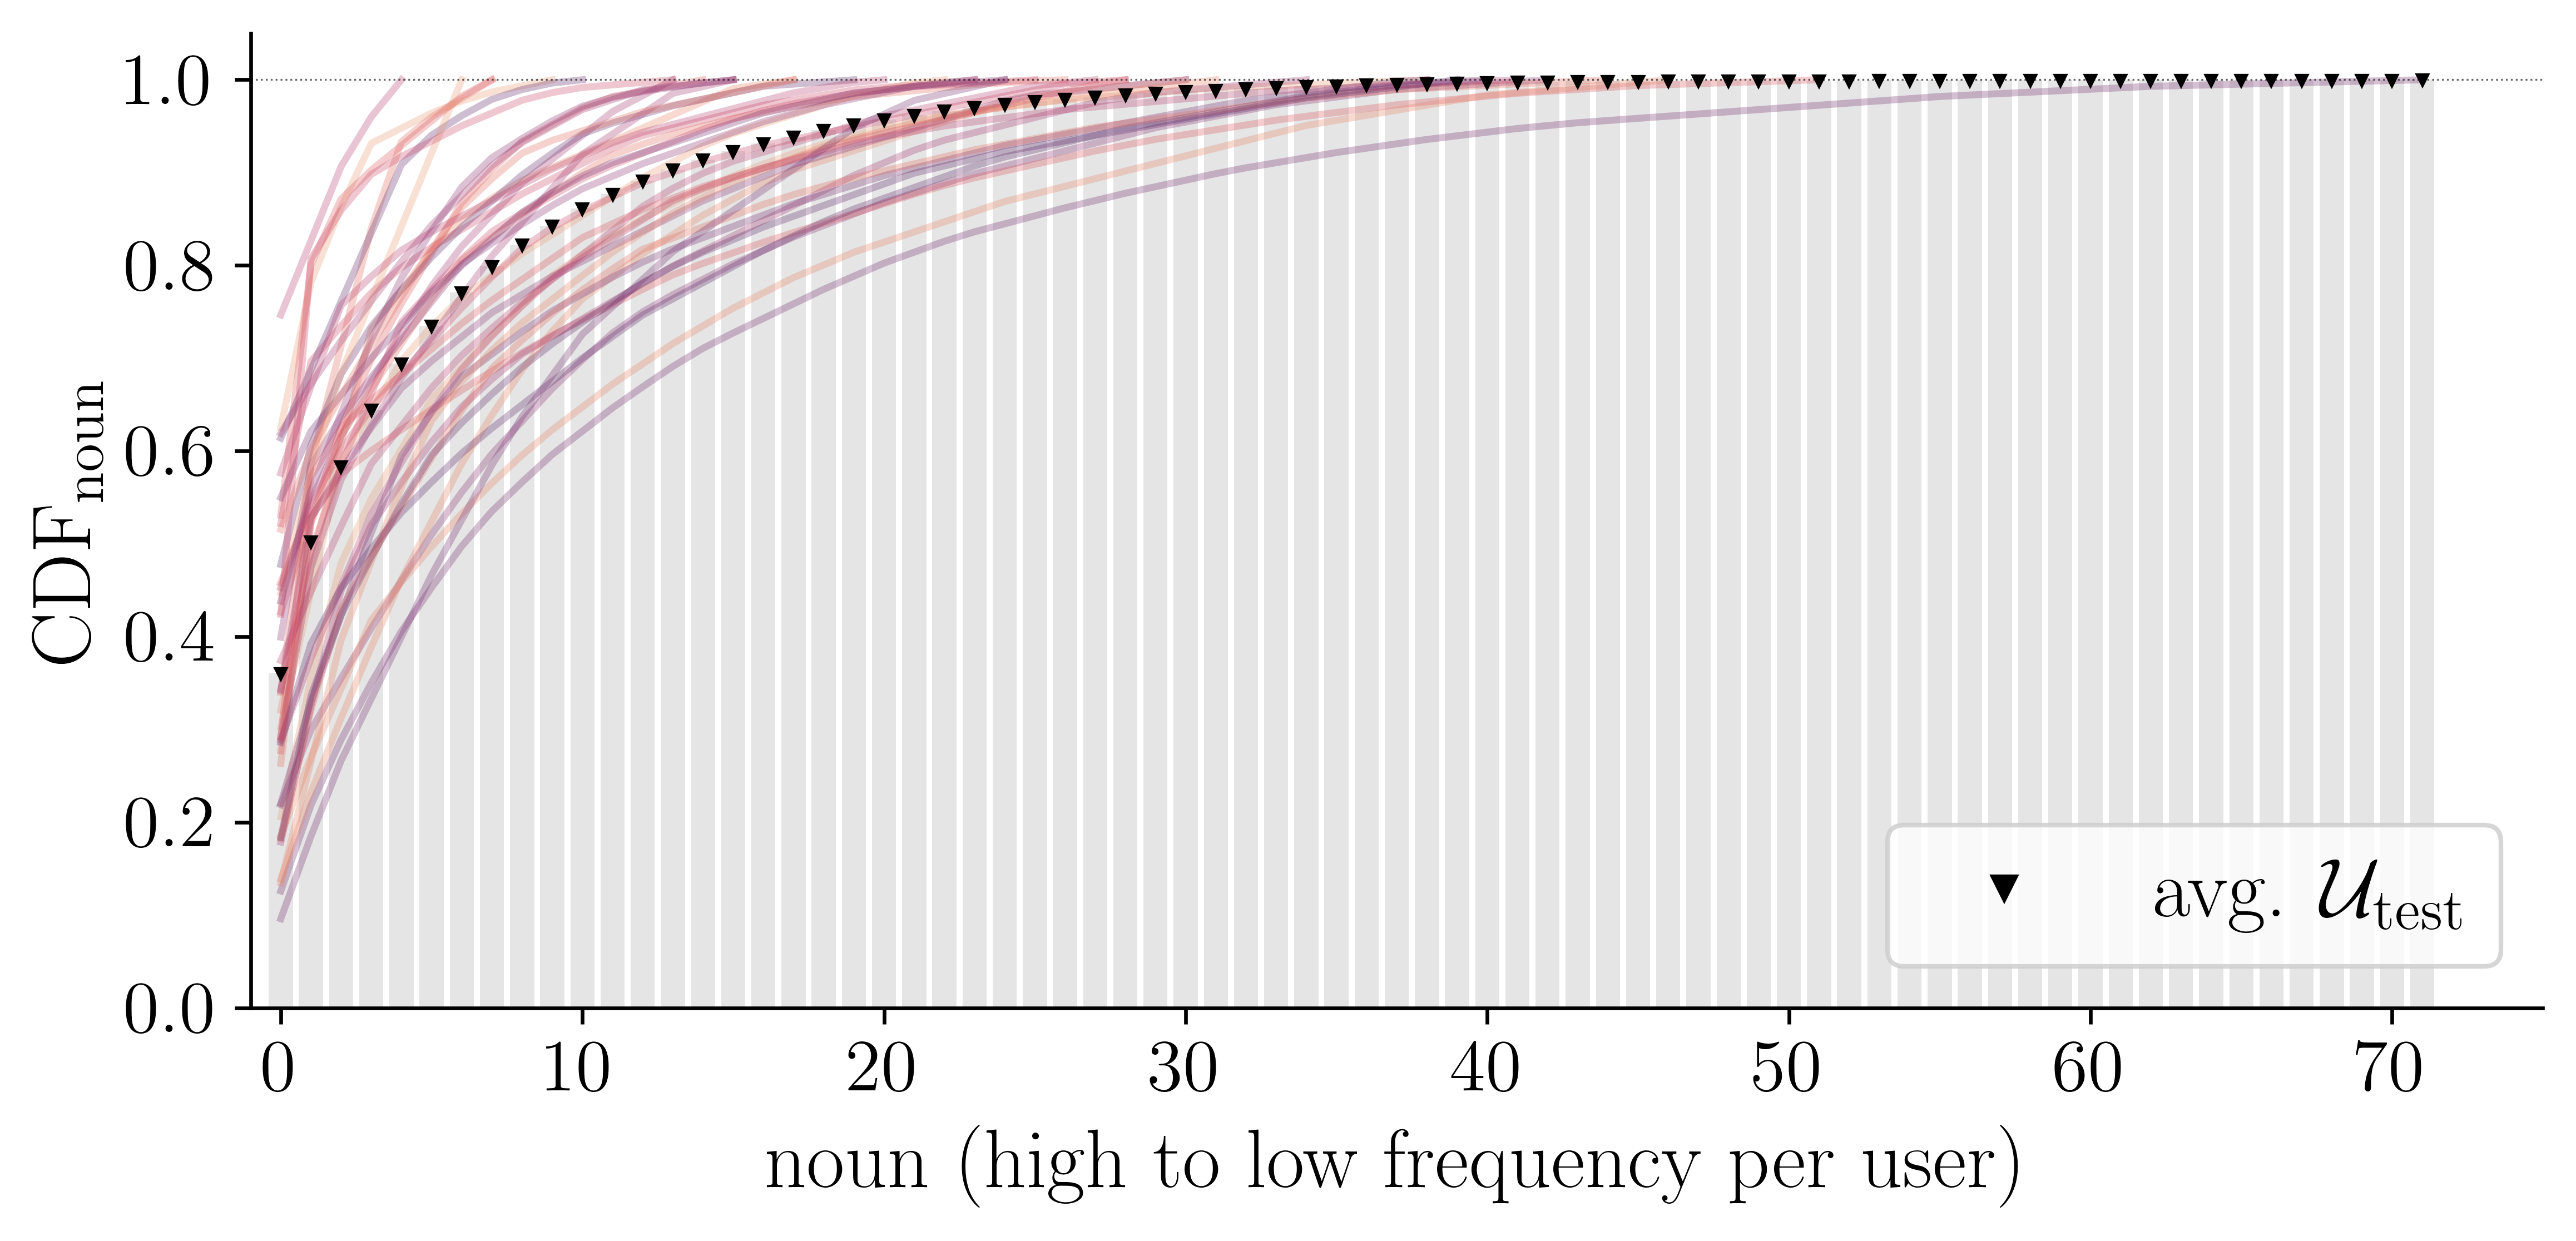

Saved plot: ../imgs/label_histogram_new/2022-10-27_18-17-40_LABEL_HISTOGRAM_TEST/LABEL_HISTOGRAM_TEST_action (high to low frequency per user).pdf


<Figure size 432x288 with 0 Axes>

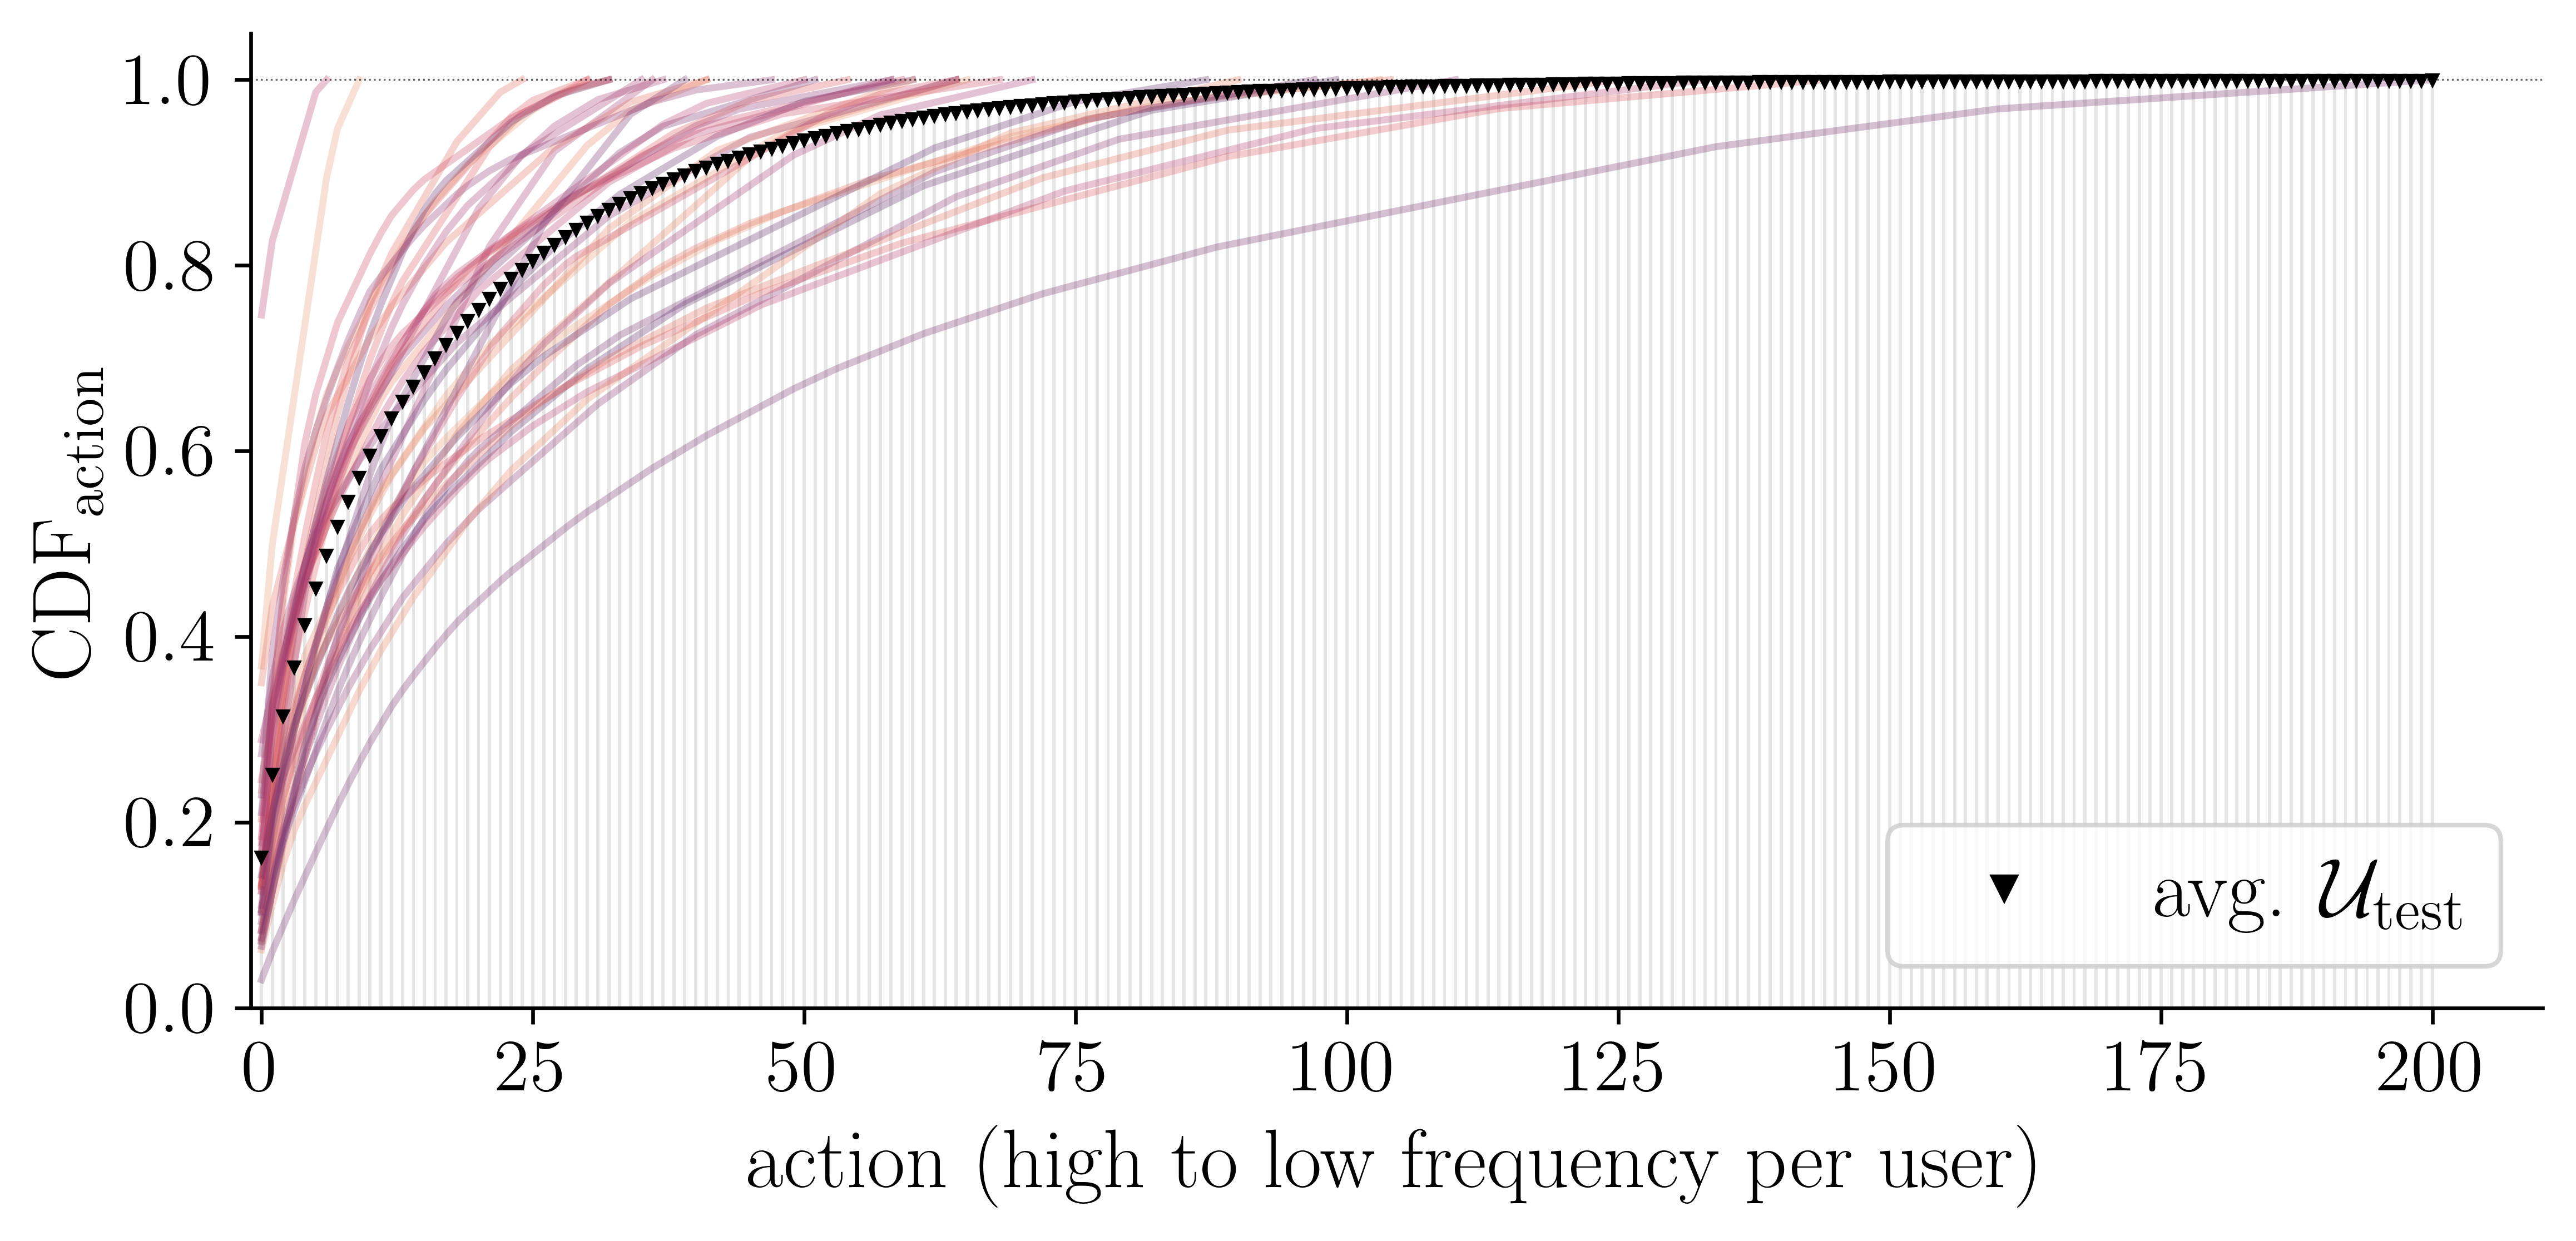

<Figure size 432x288 with 0 Axes>

In [21]:
import seaborn as sns
import datetime
import os

main_outdir = "../imgs/label_histogram_new"
title = f"LABEL_HISTOGRAM_{'TRAIN' if TRAIN_USERS_MODE else 'TEST'}"
parent_dirname = datetime.datetime.now().strftime('%Y-%m-%d_%H-%M-%S') + "_" + title
parent_dirpath = os.path.join(main_outdir, parent_dirname)
os.makedirs(parent_dirpath, exist_ok=True)

# MPL CONFIG
# sns.set(font_scale=0.5)
# plt.rcParams['font.family'] = 'DeJavu Serif'
# plt.rcParams['font.serif'] = ['Times New Roman']
# plt.rcParams['font.size'] = 1 # Instead of 10
# plt.rcParams.update(**font)

plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams['font.size'] = 16

fontsize = 16
params = {'font.family':'DeJavu Serif','font.serif':'Times New Roman',
          'axes.labelsize': fontsize+2,'axes.titlesize':fontsize, 'font.size': fontsize, 'legend.fontsize': fontsize, 'xtick.labelsize': fontsize, 'ytick.labelsize': fontsize}
plt.rcParams.update(params)

figsize = (6,4)
figsize = (8,3)
xlim=(-1,None)


# LINE CONFIG
line_colors = sns.color_palette("flare", 10) 
cumul=True

if cumul:
    ylim=(None,None)
else:
    ylim=(-0.1,None)

if TRAIN_USERS_MODE:
    line_alpha=0.45
else:
    line_alpha=0.3


# BARCHART CONFIG
plot_yerror = None 
bar_color = 'black' #my_cmap.colors if bar_colors is None else bar_colors[plot_idx]
legend_label = None
bar_align='center'
log=False
legend_labels=None
grid = False
bar_alpha = 0.1
bar_marker_offset=0
bar_width=0.4

class PlotEntry:
    def __init__():
        self.x_vals = None
        self.y_vals = None
        self.label_name = None

""" Plot average histogram over user's actions/verbs/nouns."""
def plot_user_histogram_lines_and_avg_bars(dfs, label_col_name):
    """"""
    nb_users = len(dfs)
    fig, ax = plt.subplots(figsize=figsize, dpi=600)
    
    if 'action' in label_col_name:
        bar_width=0.3
        xlabel='action (high to low frequency per user)'
        ylabel = r"$\text{CDF}_\text{action}$" if cumul else r"$P_\text{action}$"
        
        
    elif 'verb' in label_col_name:
        bar_width=0.8
        xlabel='verb (high to low frequency per user)'
        ylabel = r"$\text{CDF}_\text{verb}$" if cumul else r"$P_\text{verb}$"

    elif 'noun' in label_col_name:
        bar_width=0.8
        xlabel='noun (high to low frequency per user)'
        ylabel = r"$\text{CDF}_\text{noun}$" if cumul else r"$P_\text{noun}$"

    else:
        raise ValueError()
    
    # Create per user a plot-entry
    user_avg_dict_list = []
    
    # Iterate users, get per-users histogram and plot line
    for user_idx, (user_id, user_df) in enumerate(dfs.items()):
#         print(f"Idx {user_idx}: User {user_id}")
        cnt = Counter(user_df[label_col_name].tolist())

        col_sorted = sorted([(k,v) for k,v in cnt.items() ] ,key=lambda x: x[1], reverse=True)
        vals_sorted = [x[0] for x in col_sorted] # Action/verb/noun ids
        cnts_sorted = [x[1] for x in col_sorted] # Frequencies (counts)
        
        # Normalize counts
        total_count = sum(cnts_sorted)
        cnts_sorted_n = [float(x)/total_count for x in cnts_sorted]
        
        # Plot
        y_vals= cnts_sorted_n
        x_vals= list(range(len(cnts_sorted_n)))
        
        y_vals_for_avg = y_vals
        if cumul:
            y_vals_c =  [y_vals[0]]
            for idx in range(1,len(y_vals)):
                y_vals_c.append(y_vals_c[-1]+y_vals[idx])
            y_vals = y_vals_c
        
        # TODO PLOT
        color = line_colors[user_idx % len(line_colors)]
        plt.plot(x_vals,y_vals,alpha=line_alpha,color=color)
        
        user_avg_dict_list.append({
        'user_id':user_id,'y_vals':y_vals_for_avg
        })

#         print(f"Freqs for {label_col_name}: {cnts_sorted}")
#         print(f"Labels for {label_col_name}: {vals_sorted}")

    # Get avg of all user histograms + SE -> Barplot
    # Get max length, pad others
    max_val_len = max(len(d['y_vals']) for d in user_avg_dict_list)
    
    arrays_to_avg = []
    for d in user_avg_dict_list:
        zeros_to_append = max_val_len - len(d['y_vals'])
        if zeros_to_append > 0:
            d['y_vals'] = d['y_vals'] + [0]*zeros_to_append
        arrays_to_avg.append(d['y_vals'])
    
    arrays_to_avg_np = np.asarray(arrays_to_avg)
    
    avg_yvals = np.mean(arrays_to_avg_np,axis=0) # keep 0-dim
    avg_xvals = list(range(len(avg_yvals)))
#     sem = scipy.stats.sem

    # Take cumul of mean
    if cumul:
        avg_yvals_c =  [avg_yvals[0]]
        for idx in range(1,len(avg_yvals)):
            avg_yvals_c.append(avg_yvals_c[-1]+avg_yvals[idx])
        avg_yvals = avg_yvals_c


    plt.bar(avg_xvals, height=avg_yvals, yerr=plot_yerror, label=legend_label,
            color=bar_color, align=bar_align, width=bar_width, log=log,
            alpha=bar_alpha,
#                linewidth=0.1,edgecolor='white'
           )

    x_center = [el+bar_marker_offset for el in avg_xvals]
    plt.plot(x_center, avg_yvals, marker="v",markersize=1.6,
             linestyle="", alpha=1, color="black",label=r'avg. $\mathcal{U}_\text{test}$')
    
    leg = plt.legend(fontsize=18, markerscale=3, loc='lower right', prop={'size':18})

    plt.axhline(y=1, color='black', linestyle=':',alpha=0.6,linewidth=0.4)
    
    # Hide the right and top spines
    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)
    
#     ax.spines.right.set_visible(True)
#     ax.spines.bottom.set_visible(True)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

#     if x_labels:
#         plt.xticks(x_axis, x_labels, rotation='vertical')
#     if y_labels:
#         plt.yticks(y_vals, y_labels)

#     plt.ylim(None, max_val * 1.01)
    plt.xlim(*xlim)
    plt.ylim(*ylim)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
#     print(title)
#     plt.title(title)
    plt.grid(grid, which='both')
    fig.tight_layout() 

    # Save
    if parent_dirpath is not None:
        filename = f"{title}_{xlabel}.pdf"
        filepath = os.path.join(parent_dirpath,filename)
        fig.savefig(filepath, bbox_inches='tight')
        print(f"Saved plot: {filepath}")

    plt.show()
    plt.clf()
    


# Grids of histograms
for action_mode in  ['verb_label','noun_label','action_label']:
    plot_user_histogram_lines_and_avg_bars(dfs, action_mode)